# Introduction

In [1]:
#This notebook aims to:
#Analyse Each and Every Attributes in the data set.
#Build Various ML Models with the view of increasing accuracy of the Model.

# Importing Required Libraries

In [2]:
import pandas as pd  #data preprocessing, CSV file (e.g. pd.read_csv)
import numpy as np  #linear algebra
import matplotlib.pyplot as plt #visulaize data
import seaborn as sns  #visalization of data
import missingno as mso #visualize missing values
%matplotlib inline

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Analyzing Data

In [3]:
#to read csv data
data = pd.read_csv('seattle-weather.csv')

In [4]:
data.head(8)

,date,precipitation,temp_max,temp_min,wind,Summary,wind_drection,weather
0,1/1/2012,0.0,12.8,5.0,4.7,Partly Cloudy,West,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,Partly Cloudy,North,rain
2,1/3/2012,0.8,11.7,7.2,2.3,Mostly Cloudy,North,rain
3,1/4/2012,20.3,12.2,5.6,4.7,Partly Cloudy,North,rain
4,1/5/2012,1.3,8.9,2.8,6.1,Mostly Cloudy,North,rain
5,1/6/2012,2.5,4.4,2.2,2.2,Partly Cloudy,North,rain
6,1/7/2012,0.0,7.2,2.8,2.3,Partly Cloudy,North,rain
7,1/8/2012,0.0,10.0,2.8,2.0,Partly Cloudy,North,sun


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1436 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   Summary        1461 non-null   object 
 6   wind_drection  1461 non-null   object 
 7   weather        1461 non-null   object 
dtypes: float64(4), object(4)
memory usage: 91.4+ KB


In [6]:
data.shape

(1461, 8)

# Data Exploration

<AxesSubplot:xlabel='weather', ylabel='count'>

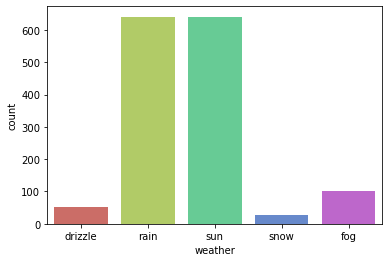

In [7]:
sns.countplot("weather",data=data,palette="hls")

this data shows, the sum of drizzle, rain, sun weather, snow,and fog days. whereas, ranin and sun weather day ahs highest count but snow has lowest count.

In [8]:
#Displaying percentage of day's data
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


It shows rainny percentage is higher and snow percentage is lower.

# Numerical Or Continuous variables

In [9]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1436.000000,1461.000000,1461.000000,1461.000000
mean,3.010237,16.439083,8.234771,3.241136
std,6.654280,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [10]:
data.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.236824,-0.085276,0.327079
temp_max,-0.236824,1.000000,0.875687,-0.164857
temp_min,-0.085276,0.875687,1.000000,-0.074185
wind,0.327079,-0.164857,-0.074185,1.000000


<AxesSubplot:xlabel='wind', ylabel='Count'>

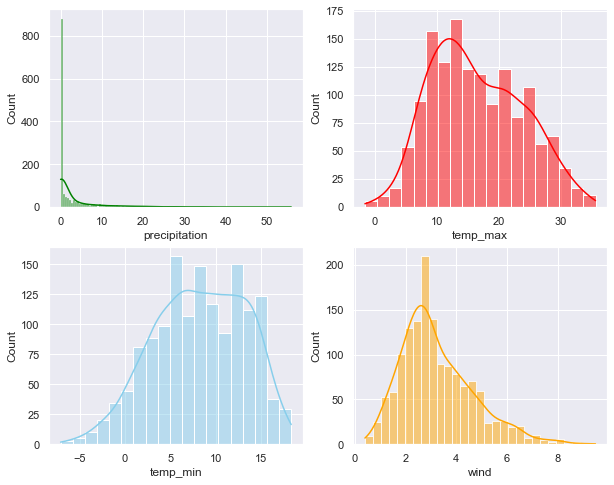

In [11]:
#Distribution of numerical value using Histogram plot
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

Precipitation and wind are both sensitive to outliers, as shown in the above histogram.
And temp min is negatively skewed, with some outliers with both.

# Finding Outliers

<AxesSubplot:xlabel='precipitation', ylabel='weather'>

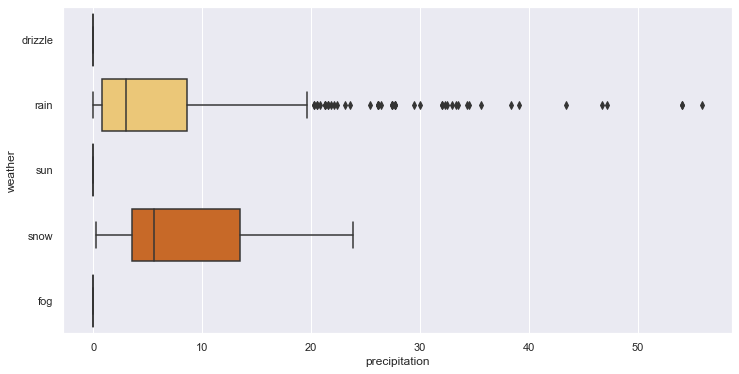

In [12]:
#plotting data of precipitation and weather columns
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="YlOrBr")

The value comes from the above box plot between Weather and Precipitation. Rain has a lot of positive outliers, and both Rain and Snow are favorably biased.

<AxesSubplot:xlabel='temp_max', ylabel='weather'>

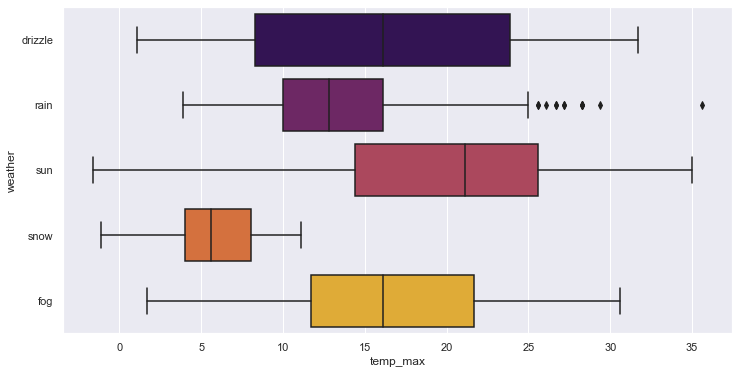

In [13]:
#plotting data of temp_max and weather columns
plt.figure(figsize=(12,6))
sns.boxplot("temp_max","weather",data=data,palette="inferno")

<AxesSubplot:xlabel='wind', ylabel='weather'>

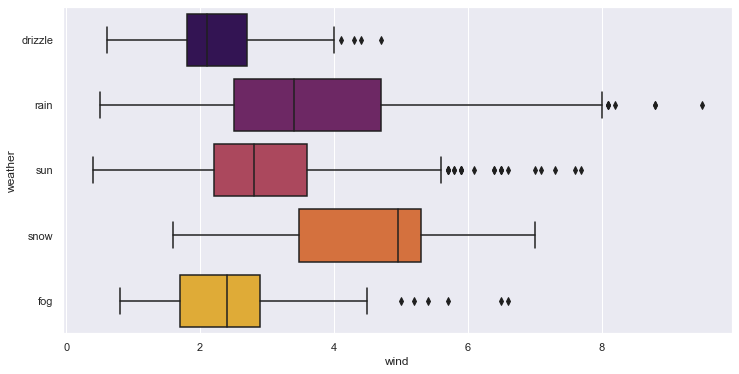

In [14]:
#plotting data of wind and weather columns
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")

<AxesSubplot:xlabel='temp_min', ylabel='weather'>

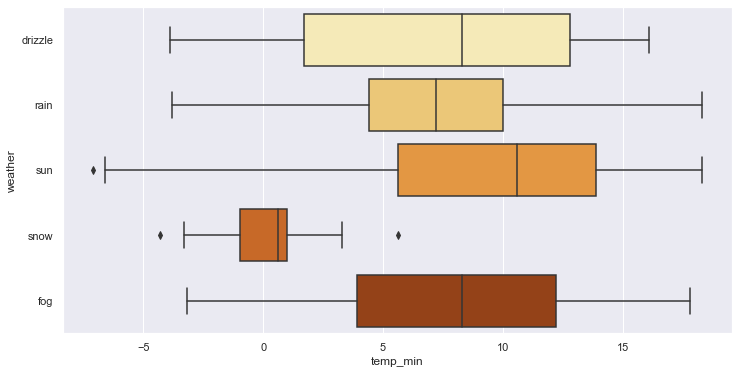

In [15]:
#plotting data of temp_min and weather columns
plt.figure(figsize=(12,6))
sns.boxplot("temp_min","weather",data=data,palette="YlOrBr")

Some data has negatives outliers, while others have both positively and negatively outliers, and snow is biased negatively.

<AxesSubplot:>

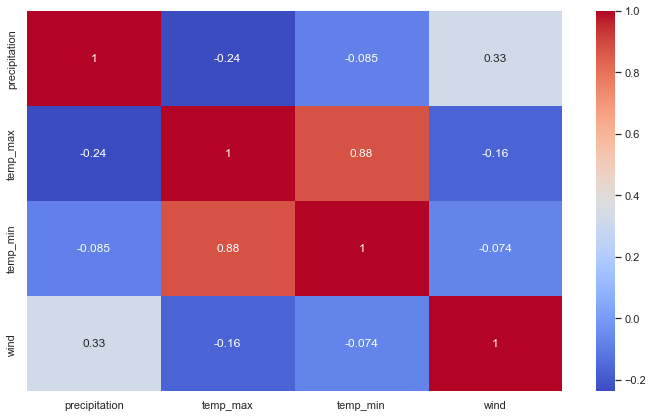

In [16]:
#using heatmap to visualize
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Pearson correlation: -0.2368243718238276


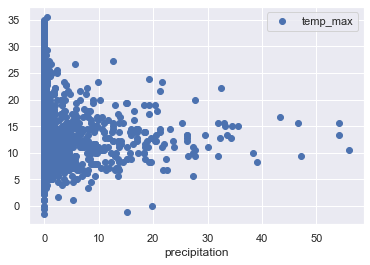

In [17]:
#numerical graphical visualization
data.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))

Pearson correlation: -0.1648566348749548


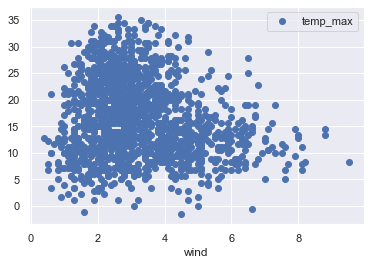

In [18]:
data.plot("wind","temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))

<AxesSubplot:xlabel='temp_max'>

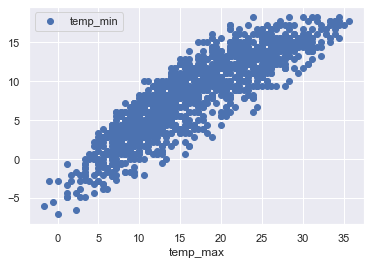

In [19]:
data.plot("temp_max","temp_min",style='o') 

# Null Values

In [20]:
#checking is their any null value
data.isna().sum()

date              0
precipitation    25
temp_max          0
temp_min          0
wind              0
Summary           0
wind_drection     0
weather           0
dtype: int64

It shows precipition column has 25 null values

In [21]:
#checking for same number's sum
data['precipitation'].value_counts()

0.0     828
0.3      52
0.5      39
1.0      25
1.5      25
       ... 
16.8      1
30.0      1
26.4      1
19.1      1
21.8      1
Name: precipitation, Length: 109, dtype: int64

In [22]:
#filling null values
data['precipitation'].fillna(method='ffill',inplace=True,axis=0)

In [23]:
data['precipitation'].value_counts()

0.0     843
0.3      52
0.5      39
1.0      26
0.8      25
       ... 
16.8      1
30.0      1
26.4      1
19.1      1
21.8      1
Name: precipitation, Length: 109, dtype: int64

In [24]:
#checking null values
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
Summary          0
wind_drection    0
weather          0
dtype: int64

Now, their is non null values in the data sets.

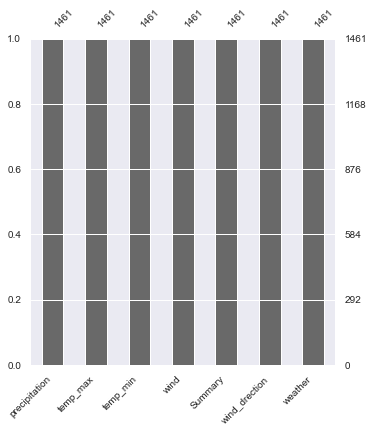

In [25]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=10);

The fig shows, their is no null value in the data set.

# Data Preprocessing

In [26]:
#Droping unnecessary variables becasue it does not affect any changes in our data outcomes. 
df=data.drop(["date"],axis=1)

In [27]:
#Removing the outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [28]:
#Correction for standard deviation
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<AxesSubplot:xlabel='wind', ylabel='Count'>

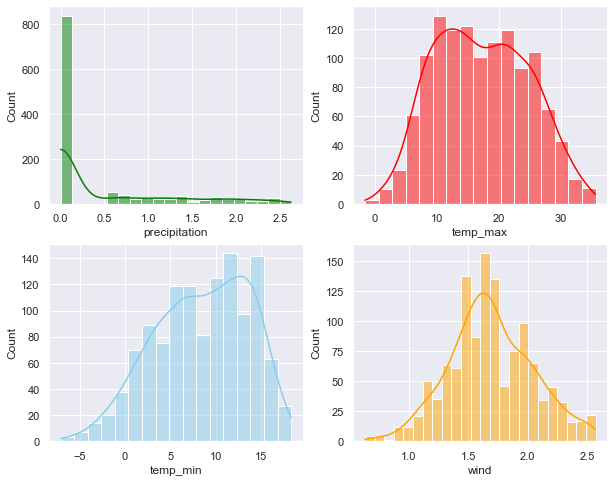

In [29]:
#cheking for the outliers
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [30]:
df.head()

,precipitation,temp_max,temp_min,wind,Summary,wind_drection,weather
0,0.000000,12.8,5.0,2.167948,Partly Cloudy,West,drizzle
2,0.894427,11.7,7.2,1.516575,Mostly Cloudy,North,rain
4,1.140175,8.9,2.8,2.469818,Mostly Cloudy,North,rain
5,1.581139,4.4,2.2,1.483240,Partly Cloudy,North,rain
6,0.000000,7.2,2.8,1.516575,Partly Cloudy,North,rain


### LabelEncoder

In [31]:
#Using the label encoder to scale the weather, summary, wind_direction variables:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()

#converting categorical data into numerical
df["weather"]=le.fit_transform(df["weather"])
df["Summary"]=le.fit_transform(df["Summary"])
df["wind_drection"]=le.fit_transform(df["wind_drection"])

In [32]:
#checking for data
df.sample(10)

,precipitation,temp_max,temp_min,wind,Summary,wind_drection,weather
983,0.000000,22.2,12.2,1.974842,3,7,4
560,0.000000,27.8,12.8,1.732051,6,7,4
1280,0.000000,33.3,15.0,1.702939,7,11,4
56,1.140175,5.0,-1.1,1.843909,8,7,3
749,0.000000,6.1,3.3,1.581139,8,15,4
923,0.000000,32.2,16.7,1.483240,3,7,4
85,0.000000,12.8,6.1,2.073644,6,13,0
1088,2.302173,7.2,3.9,1.341641,8,14,2
147,0.000000,17.2,11.7,1.923538,6,7,4
755,0.000000,12.2,1.1,0.894427,8,14,4


### Splitting data INTO DEPENDANT AND INDEPENDANT VARIABLES

In [33]:
#where x is independent variables and y is dependent
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [34]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [35]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()           #normalizer scaler has been used 
x_scaled=scaler.fit_transform(x)

In [36]:
#training and testing data
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=12)

# Training the Model

In [37]:
#Using logistic regression
from sklearn.linear_model import LogisticRegression

model_LR=LogisticRegression()
model_LR.fit(x_train,y_train)
print("Logestic Regrssion Accuracy:{:.2f}%".format(model_LR.score(x_test,y_test)*100))

Logestic Regrssion Accuracy:75.00%


In [38]:
# Using Random Forest Classifier algorithm to predict the weather
# Training model on test data

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
RF.fit(x_train,y_train)
print("Random Forest Accuracy:{:.2f}%".format(RF.score(x_test,y_test)*100))

Random Forest Accuracy:71.77%


In [39]:
# To see importance of each variable in prediction
RF.feature_importances_

array([0.25497847, 0.2889189 , 0.22088448, 0.0359621 , 0.09345916,
       0.10579689])

In [40]:
#Using Decision tree alorithm to predict weather
from sklearn.tree import  DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)
print("Decision Tree Accuracy:{:.2f}%".format(clf.score(x_test,y_test)*100))

Decision Tree Accuracy:64.52%


### hyper parameter tuning

In [41]:

from sklearn.model_selection import GridSearchCV
model_params = { 
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30],
            'n_estimators': [25,50,75,100]
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25],
            'max_iter' : [100 , 200 , 300 , 500],
            'solver' : ['newton-cg' , 'lbfgs' , 'sag' , 'saga']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best', 'random'],
            'random_state': [0.1,0.5,10,20,30,40,50]
        }
    }
}

In [42]:

scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,random_forest,0.699735,{'n_estimators': 75}
1,logistic_regression,0.736725,"{'C': 1, 'max_iter': 300, 'solver': 'lbfgs'}"
2,decision_tree,0.614981,"{'criterion': 'entropy', 'random_state': 10, '..."


With the use of GridSearchCV, we have sucessfully found the the best value for hyperparameters which is known as hyperparameter tuning. logistic_regression classifier was fond to give an accuracy of 0.73 when c is 1, and max iteration is 300 with solver lbfgs.

​

# Choosing the Best model

In [43]:
#Logistic regression model
modelfinal=LogisticRegression(C= 1, max_iter =300, solver='lbfgs')
modelfinal.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=300)

In [44]:
modelfinal.score(x_test,y_test)*100

75.0

# Conclusion

In [45]:
df.to_csv("weather.csv")